# Studio 3 -- Root Finding in 1D
## Put your group number and the full names of you and your groupmates here:
### Group: #
- 1 -- Victor Nguyen
- 2 -- Hannah James
- 3 -- Viktorya Hunanyan



In [1]:
## run this cell first to import all the necessary tools
import numpy as np
from scipy.optimize import brentq,newton
from matplotlib import pyplot as plt


# Root Finding with SciPy


As you might expect, SciPy contains variations of the rootfinders that we've been developing in class.  For scalar functions (that is, 1D real-valued functions), this includes a variant of the bisection algorithm called **Brent’s method** that combines the former with a bit of extrapolation that helps it to converge faster.  It also contains functions for implementing **Newton-Raphson**.  We will use both of these to solve for the 3 solutions of the transcendental equation:

## $$ 3\cos(x) = x ~~~~~~~~~~~ x \in[-\pi,\pi]$$

**Note** We will use the default error tolerances for all of the SciPy functions below.


# Problem 1
## `brentq`: SciPy's Better Version of Bisection


### Part A)

Write the above transcendental function as a root-finding problem (that is, $f(x)=0$), and plot the function with 1000 points between $-\pi$ and $\pi$.

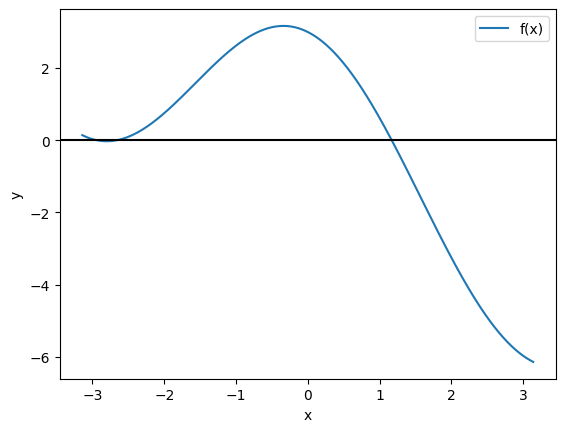

In [20]:
def func_zero(x):
    '''
    returns the zero function of the above transcendental equation
        
    PARAMETERS:
        x - input number (or NumPy array)
    
    RETURN VALUE:
        f(x) - output number (or NumPy array)
    '''
    # ??? Put your solution here ???

    result = 3*np.cos(x) - x
    
    return result

xs = np.linspace(-np.pi, np.pi, 1000)
ys = func_zero(xs)

plt.plot(xs, ys, label='f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.legend()
plt.show()


### Part B)

Using the SciPy function `brentq`, find the root that lies between 0 and $\pi$.  Have the rootfinder return not only the root, but the number of iterations it took to get there and the number of function evaluations.

**Hint:** The `brentq` function has an optional input called `full_output`.  Read the documentation to see how to use it

In [6]:
# ??? Put your function call here ???

root = brentq(func_zero, 0, np.pi, full_output=True)

root

(1.170120950002626,
       converged: True
            flag: converged
  function_calls: 9
      iterations: 8
            root: 1.170120950002626
          method: brentq)

# Problem 2
## Newton-Raphson with and without derivatives


Now we'll switch to using the `newton` function (SciPy's version of the Newton-Raphson root finder).  If you read the documentation however, you'll note that the `newton` function *does not necessarily need a derivative*!  That's because it uses the iterations to guess what the derivative of the function is (called the [secant method](https://en.wikipedia.org/wiki/Secant_method)).  However, if you *do* provide the derivative, it uses the faster, classic Newton-Raphson method we've developed in class.  You can also provide the **second derivative**, and implement a higher-order version of Newton-Raphson called [Halley's method](https://en.wikipedia.org/wiki/Halley%27s_method).

### Part A)

Write down functions that return the first and second derivatvies of your root function above.

In [13]:
def d_func_zero_dx(x):
    '''
    returns the first derivative of your zero function
        
    PARAMETERS:
        x - input number (or NumPy array)
    
    RETURN VALUE:
        f(x) - output number (or NumPy array)
    '''
    
    # ??? Put your solution here ???
    result = -3. * np.sin(x) - 1
    
    return result

def d2_func_zero_dx2(x):
    '''
    returns the second derivative of your zero function
        
    PARAMETERS:
        x - input number (or NumPy array)
    
    RETURN VALUE:
        f(x) - output number (or NumPy array)
    '''
    
    # ??? Put your solution here ???
    result = -3. * np.cos(x)
    
    return result


### Part B)

Call the SciPy `newton` function, starting from $x_0=-2$, three times: once providing only the function (secant method), once providing the function and the first derivative (Newton-Raphson method), and once providing the function, first, and second derivative (Halley's method)

In [8]:
# ??? Put your first function call here ???

root1 = newton(func_zero, -2, full_output=True)
print(root1)


(-2.6631788833637793,       converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: -2.6631788833637793
         method: secant)


In [9]:
# ??? Put your second function call here ???
root2 = newton(func_zero, -2, d_func_zero_dx, full_output=True)
print(root2)

(-2.6631788833637797,       converged: True
           flag: converged
 function_calls: 14
     iterations: 7
           root: -2.6631788833637797
         method: newton)


In [15]:
# ??? Put your third function call here ???

root3 = newton(func_zero, -2, fprime=d_func_zero_dx, fprime2=d2_func_zero_dx2, full_output=True)
print(root3)

(-2.663178883363778,       converged: True
           flag: converged
 function_calls: 15
     iterations: 5
           root: -2.663178883363778
         method: halley)


## Answer needed: **do the number of iterations behave like you expect**?

Yes the number of iterations decrease when we include the first and second derivatives because it does not use iterations to compute/guess the derivatives fi we already include them. 

### Part C)

We want to know how the number of iterations changes as a function of our starting guess.  Try each of your above methods starting from $x$'s between $-\pi$ and $\pi$ (use the same `xs` you used for the plot in problem 1 part A).  Instead of saving the root reached from each starting point, **record how many iterations it took to converge to a root**.

You should get three lists (or NumPy arrays) that contain the number of iterations back out.  **Create a plot of starting $x$ versus number of iterations** 

**Hint 1:** Use a Python `for` loop and append to lists here (there isn't a good NumPy array way to pull out the iterations)

**Hint 2:** When `full_output=True`, the `newton` function is returning a tuple of `(root, result)`, where `result` is a Python **class**.  You can return an element of the class with `result.element`, where `element` is the name of the thing you want to pull out. I have provided an example below.

**Hint 3:** By default, `newton` will raise an error when the root doesn't converge.  If you pass `disp=False`, it will just go to `maxiter` number of iterations instead.





In [38]:
## Example of returning getting the number of iterations of the Newton function starting from x=0.5

# root,result = newton(func_zero,0.5,full_output=True)
# print(root)



In [39]:
## Put your for loop and number of iterations here

iterations1 = []
iterations2 = []
iterations3 = []

for i in xs:
    root1, result1 = newton(func_zero, i, full_output=True)
    root2, result2 = newton(func_zero, i, fprime=d_func_zero_dx, full_output=True, disp=False)
    root3, result3 = newton(func_zero, i, fprime=d_func_zero_dx, fprime2=d2_func_zero_dx2, full_output=True, disp=False)
    iterations1.append(result1.iterations)
    iterations2.append(result2.iterations)
    iterations3.append(result3.iterations)

    








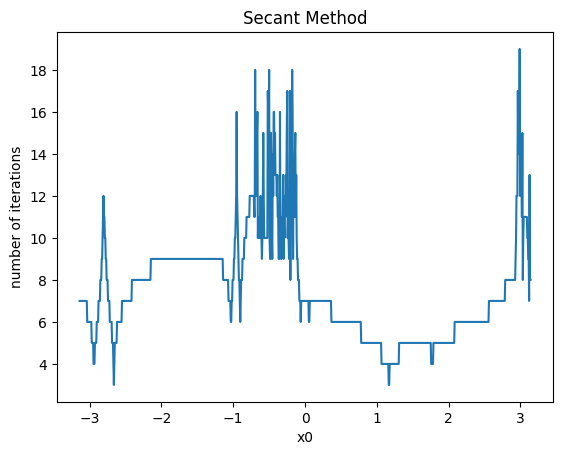

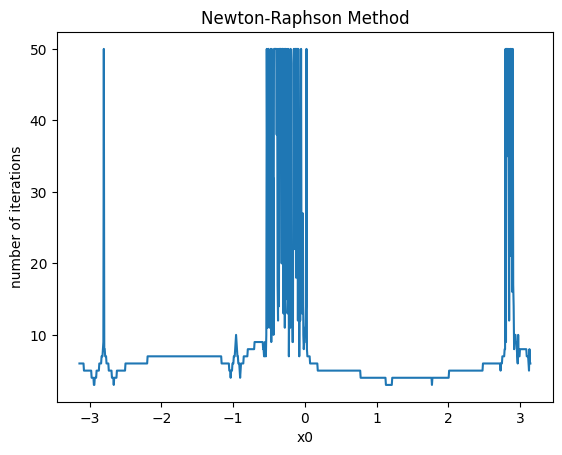

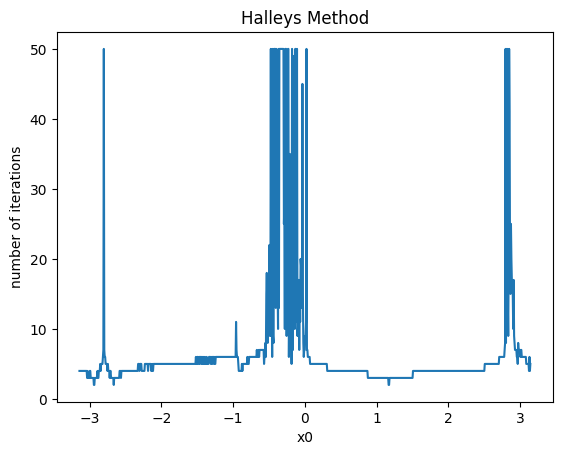

In [40]:
## Put your plots here
plt.figure()
plt.plot(xs, iterations1)
plt.xlabel('x0')
plt.ylabel('number of iterations')
plt.title('Secant Method')
plt.show()

plt.figure()
plt.plot(xs, iterations2)
plt.xlabel('x0')
plt.ylabel('number of iterations')
plt.title('Newton-Raphson Method')
plt.show()

plt.figure()
plt.plot(xs, iterations3)
plt.xlabel('x0')
plt.ylabel('number of iterations')
plt.title('Halleys Method')
plt.show()

## Answer needed: Does this make sense?  What are the large spikes?

The large spikes are when the root doesn't converge, and it sets the iterations to the maxiter, which is assigned to be 50. 